In [1]:
import joblib

sa_vec = joblib.load("sa_vectorizer.joblib")
esa_vec = joblib.load("esa_vectorizer.joblib")

print("sa vectorizer vocab size:", len(sa_vec.get_feature_names_out()))
print("esa vectorizer vocab size:", len(esa_vec.get_feature_names_out()))

sa vectorizer vocab size: 10000
esa vectorizer vocab size: 10000


In [2]:
def load_txt_lines(path):
    with open(path, encoding="utf-8") as f:
        return [line.strip() for line in f if line.strip()]

train_medium = load_txt_lines("math/train-medium/arithmetic__div.txt")
# Similarly load train-medium, train-hard, test, etc.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# For standalone TF‑IDF transformation:
X_train_sa = sa_vec.transform(train_medium)
X_train_esa = esa_vec.transform(train_medium)

print("SA matrix shape:", X_train_sa.shape)
print("ESA matrix shape:", X_train_esa.shape)

SA matrix shape: (1333332, 10000)
ESA matrix shape: (1333332, 10000)


In [4]:
def load_lines(path):
    return [line.strip() for line in open(path, encoding="utf-8") if line.strip()]

train = load_lines("math/train-medium/polynomials__collect.txt")  # adjust paths
test = load_lines("math/interpolate/calculus__differentiate.txt")

print("Train count:", len(train), "Test count:", len(test))

Train count: 1333332 Test count: 20000


In [5]:
X_train_sa = sa_vec.transform(train)
X_train_esa = esa_vec.transform(train)
print("SA matrix size:", X_train_sa.shape)
print("ESA matrix size:", X_train_esa.shape)

SA matrix size: (1333332, 10000)
ESA matrix size: (1333332, 10000)


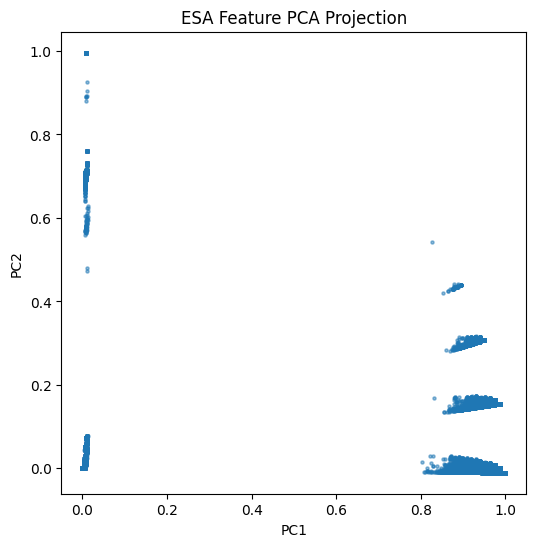

In [6]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Reduce ESA features to 2D
svd = TruncatedSVD(n_components=2)
coords = svd.fit_transform(X_train_esa)

plt.figure(figsize=(6, 6))
plt.scatter(coords[:, 0], coords[:, 1], s=5, alpha=0.5)
plt.title("ESA Feature PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [7]:
import numpy as np

components = svd.components_  
feature_names = esa_vec.get_feature_names_out()  

for idx, pc in enumerate(components):
    top_idx = np.argsort(np.abs(pc))[::-1][:10]
    print(f"Top features for PC{idx + 1}:")
    for i in top_idx:
        print(f"  {feature_names[i]} (loading {pc[i]:.3f})")
    print()

Top features for PC1:
  terms (loading 0.707)
  collect (loading 0.707)
  10 (loading 0.009)
  11 (loading 0.008)
  12 (loading 0.007)
  13 (loading 0.007)
  14 (loading 0.006)
  15 (loading 0.006)
  16 (loading 0.006)
  17 (loading 0.005)

Top features for PC2:
  10 (loading 0.996)
  11 (loading 0.072)
  12 (loading 0.039)
  13 (loading 0.025)
  14 (loading 0.016)
  15 (loading 0.014)
  16 (loading 0.011)
  17 (loading 0.009)
  18 (loading 0.009)
  terms (loading -0.007)



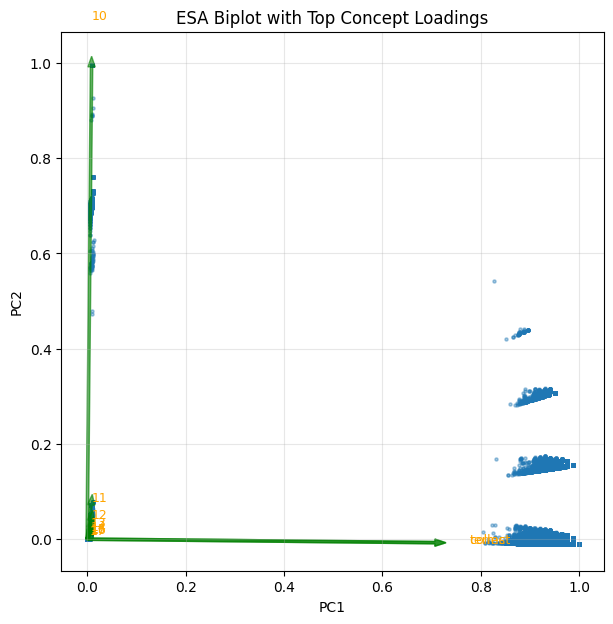

In [8]:
import matplotlib.pyplot as plt

# Select top K features by magnitude
K = 10
scores = coords
loadings = svd.components_.T
mags = np.linalg.norm(loadings, axis=1)
top_features = np.argsort(mags)[::-1][:K]

plt.figure(figsize=(7, 7))
plt.scatter(scores[:, 0], scores[:, 1], s=5, alpha=0.4)

for i in top_features:
    x, y = loadings[i] * np.abs(scores).max(axis=0)
    plt.arrow(0, 0, x, y, color='green', alpha=0.6, width=0.005)
    plt.text(x * 1.1, y * 1.1, feature_names[i], color='orange', fontsize=9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("ESA Biplot with Top Concept Loadings")
plt.grid(alpha=0.3)
plt.show()

#### Placemaker. Need further analysis.

In [ ]:
import pandas as pd
import re
from ydata_profiling import ProfileReport

# Load data
df = pd.read_csv("folder/train-medium/qa.csv")  # adjust path

# cleaning
for col in ['question', 'answer']:
    df[col] = df[col].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True)

# Quick profile of cleaned dataset
profile = ProfileReport(df, title="Q/A Text Profiling", explorative=True)
profile.to_file("qa_profile.html")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

# Replace with actual labels aligned to your data
y = np.load("math/train_labels.npy")

X_train, X_val, y_train, y_val = train_test_split(
    X_train_esa, y, test_size=0.2, random_state=42
)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
preds = clf.predict(X_val)

print(metrics.classification_report(y_val, preds))
print("Confusion matrix:\n", metrics.confusion_matrix(y_val, preds))

In [ ]:
# moving to draft 4